# Final Project Submission

Please fill out:

Student name: Phillip Ojo 

Student pace: Part-time

Scheduled project review date/time: Feburary 2, 2021 7:00pm

Instructor name: Amber Yandow

Blog post URL:


# Introduction

## Business Problem

   Twitter has over 300 million monthly active users, which allows businesses to reach a broad audience and connect with customers without traditional marketing techniques. On the downside, there’s so much information that it’s hard for brands to quickly detect negative social mentions that could harm their business.

   That's why sentiment analysis, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.Listening to how customers feel on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand, and their competitors, and discover new trends in the industry.

   For this project, we are tasked with building an NLP model to analyze Twitter sentiment about Apple and Google products. The dataset comes from CrowdFlower via data.world. Human raters rated the sentiment in over 9,000 Tweets as positive, negative, or neither. This is extremely insightful for these companies to capture there performance when rolling out new products. Customer reviews give the best feedback on new features and govern the next directions of these companies. 



### Goals

* Create a Multi-classifier model to predit wheter a tweet has a positive emotion , negative emotion or neutral emotion.

* Determine the best mothods to clean and pre process the data

* Determine key words that are used in helping predict these diffrent classes

## Method

This project will use the OSEMN framework (outlined in brief below)

### Obtain

* Obtain Tweets dataset from data.world

### Scrub

* Remove unwanted features.

* Fill/remove null values.

* Remove stop words from corpus.

### Explore

* Create Word Cloud.

* Show word Distribution

* Show bigrams

* Lemmatize/Stem Word Tokens

### Model

* Random Forests Classifier.

* Deep NLP

### Interpret

* Results.

* Recommendations and Future Work.

# Import Libraries

# New Section

In [1]:
import pandas as pd
import numpy as np
import itertools
from nltk import word_tokenize
from gensim.models import word2vec
from nltk import FreqDist
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phillipojo24/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/phillipojo24/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/phillipojo24/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('/Users/phillipojo24/Desktop/Data Science Course Materiaal/Mod 4 project/judge-1377884607_tweet_product_company.csv',encoding= 'unicode_escape' ,)
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [3]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [4]:
#CHECKING EMOTION UNIQUE VALUES AND VALUE COUNTS
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())




No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64


# Functions

In [69]:
def model_eval_nn(y_test,y_hat_test,classes=None,
                           normalize='true',cmap='Blues',label='',
                           title='Confusion matrix'):

    
    dashes = '---'*20

    #GETTING ACCURACY SCORE FOR TRAIN AND TEST
    
    if len(label)>0:
        accuracy_header = f'{label} ACCURACY'
    else:
        accuracy_header = 'MODEL ACCURACY'
    print(dashes,accuracy_header,dashes,sep='\n')
#     training_accuracy = accuracy_score(y_train, y_hat_train)
    testing_accuracy = accuracy_score(y_test, y_hat_test)
    
#     print(f'TRAINING ACCURACY: {round(training_accuracy*100,2)}%')
    print(f'TESTING ACCURACY: {round(testing_accuracy*100,2)}%')
          
    #CLASSIFICATION REPORT AND SCORES
    test_header = "CLASSIFICATION REPORT"
    
    #ADDING LABEL IF GIVEN
    if len(label)>0:
        test_header += f" USING {label}"
    
    # PRINT CLASSIFICATION REPORT
    
    print(dashes,test_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test))#,
#                                     target_names=classes))

    print(dashes+"\n\n")
        
    # MAKE FIGURE
    fig, axes = plt.subplots(figsize=(15,5),ncols=3)      
   

    # PLOTTING CONFUSION MATRIX 

    cm = confusion_matrix(y_true=y_test, y_pred=y_hat_test,normalize=normalize)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(ax=axes[2])
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    history_df = pd.DataFrame(history.history)
#     plt.subplot(history_df[[col for col in history_df.columns if 'loss' in col]])

    loss_df = history_df[[col for col in history_df.columns if 'loss' in col]]
    loss_df = loss_df.reset_index()
    
    acc_df = history_df[[col for col in history_df.columns if 'acc' in col]]
    acc_df = acc_df.reset_index()
    
    sns.lineplot(x='index',y='val_loss',data=loss_df,marker='o',ax=axes[0])
    sns.lineplot(x='index',y='loss',data=loss_df,marker='o',ax=axes[0])
    
    sns.lineplot(x='index',y='val_accuracy',data=acc_df,marker='o',ax=axes[1])
    sns.lineplot(x='index',y='accuracy',data=acc_df,marker='o',ax=axes[1])
    
    fig.tight_layout()
    plt.show()

    
    
    
def model_eval_rff(model,X_train,y_train,X_test,y_test,classes=None,
                           normalize='true',cmap='Blues',label=''):

        
    #FITTING MODEL WITH TRAIN DATA
    model.fit(X_train,y_train)   
      
    #GETTING TRAIN PREDICTIONS
    y_hat_train = model.predict(X_train)
    
    #GETING TEST PREDICTIONS
    y_hat_test = model.predict(X_test)
    
    dashes = '---'*20
    
    
    
    #GETTING ACCURACY SCORE FOR TRAIN AND TEST
    
    if len(label)>0:
        accuracy_header = f'{label} ACCURACY'
    else:
        accuracy_header = 'MODEL ACCURACY'
    print(dashes,accuracy_header,dashes,sep='\n')
    training_accuracy = accuracy_score(y_train, y_hat_train)
    testing_accuracy = accuracy_score(y_test, y_hat_test)
    
    print(f'TRAINING ACCURACY: {round(training_accuracy*100,2)}%')
    print(f'TESTING ACCURACY: {round(testing_accuracy*100,2)}%')
          
    #CLASSIFICATION REPORT AND SCORES
    test_header = "CLASSIFICATION REPORT"
    
    #ADDING LABEL IF GIVEN
    if len(label)>0:
        test_header += f" USING {label}"
    
    # PRINT CLASSIFICATION REPORT
    
    print(dashes,test_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))

    print(dashes+"\n\n")
    
    

    # MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,10),ncols=1)
   

    # PLOTTING CONFUSION MATRIX 

    metrics.plot_confusion_matrix(model, X_test,y_test,
                                      display_labels=classes,
                                      normalize=normalize,
                                     cmap=cmap,ax=axes,xticks_rotation=45)
    axes.set(title='Confusion Matrix')
    
    fig.tight_layout()
    plt.show()

In [6]:
#DROPPING UNNEEDED COLUMNS
df.drop(['emotion_in_tweet_is_directed_at'],axis=1,inplace=True)

#Rename Colounms and Values

df.rename(columns={'tweet_text' : 'tweet' , 'is_there_an_emotion_directed_at_a_brand_or_product': 'Emotion'}, inplace=True)
df.replace(to_replace ='No emotion toward brand or product' , value = 'Neutral', regex = True, inplace= True)

#Drop "i cant tell" emotion

# Get indexes where name column doesn't have value john
indexNames = df[(df['Emotion'] == "I can't tell")].index 
# Delete these row indexes from dataFrame
df.drop(indexNames, inplace= True )

df.dropna(inplace=True)

df


,tweet,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",Neutral
9090,"Google's Zeiger, a physician never reported po...",Neutral
9091,Some Verizon iPhone customers complained their...,Neutral


In [7]:
print(df['Emotion'].value_counts())

Neutral             5388
Positive emotion    2978
Negative emotion     570
Name: Emotion, dtype: int64


In [8]:
df[df['Emotion'] == "Neutral"]


,tweet,Emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,Neutral
16,Holler Gram for iPad on the iTunes App Store -...,Neutral
32,"Attn: All #SXSW frineds, @mention Register fo...",Neutral
33,Anyone at #sxsw want to sell their old iPad?,Neutral
34,Anyone at #SXSW who bought the new iPad want ...,Neutral
...,...,...
9087,"@mention Yup, but I don't have a third app yet...",Neutral
9089,"Wave, buzz... RT @mention We interrupt your re...",Neutral
9090,"Google's Zeiger, a physician never reported po...",Neutral
9091,Some Verizon iPhone customers complained their...,Neutral


Now we will split the data into test and traning data


#Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df['tweet'].copy()
y = df['Emotion'].copy()
y.replace({'Negative emotion': 0 , 'Positive emotion' : 1 , 'Neutral': 2 }, inplace = True)
y

0       0
1       1
2       1
3       0
4       1
       ..
9088    1
9089    2
9090    2
9091    2
9092    2
Name: Emotion, Length: 8936, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=24) 

pd.Series(y_test).value_counts(normalize=True)



2    0.591316
1    0.336616
0    0.072068
Name: Emotion, dtype: float64

In [12]:
## Class imbalance
y_train.value_counts(1)

2    0.606834
1    0.332140
0    0.061027
Name: Emotion, dtype: float64

In [13]:
from sklearn.utils.class_weight import compute_class_weight

weights= compute_class_weight(
           'balanced',
            np.unique(y_train), 
            y_train)

weights_dict = dict(zip( np.unique(y_train),weights))
weights_dict

/Users/phillipojo24/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2], y=5581    1
5860    2
4968    2
4080    1
1946    2
       ..
6610    2
5344    2
3540    1
8683    1
913     0
Name: Emotion, Length: 6702, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


{0: 5.462102689486553, 1: 1.0035938903863433, 2: 0.5492992377673961}

#Clean the Tweets

In [14]:
import re 

# Create a function to clean the tweets
def cleanTxt(text):
 text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", str(text)).split()) #Removing @mentions
 text = re.sub('[^\x00-\x7f]','', str(text))  # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', str(text)) # Removing RT
 text = ' '.join(re.sub("(\w+:\/\/\S+)", " ", str(text)).split()) # Removing hyperlink
 text = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", str(text)).split()) #Removing Punctuation
 text = str(text).lower() #Make stext 
 #text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
 return text


# Clean the tweets
X_train_clean_df = X_train.apply(cleanTxt)
X_test_clean_df = X_test.apply(cleanTxt)
# Show the cleaned tweets
X_train_clean_df

5581    bounced over to catch google's marissa mayer s...
5860    google smentisce novit in arrivo we're not lau...
4968    mayer google will hire 6 000 people this year ...
4080    love google analytics thanks to the followers ...
1946    i was finally forced to google why can't peopl...
                              ...                        
6610                      the 2 takes over [video] {link}
5344     we have problems_time to stop ******* _ {link} _
3540    i agree apple stole what little part of the sh...
8683    i picked up a &quot mophie&quot iphone charge ...
913     hm do we need another 1 google to launch major...
Name: tweet, Length: 6702, dtype: object

In [15]:
#CREATING STOPWORDS LIST TO REMOVE FROM CORPUS
stopwords_list = stopwords.words('english')

# ADDING PUNCTUATION TO STOPWORDS_LIST
stopwords_list.extend(string.punctuation)



# ADDING ADDITIONAL PUNCTUATION TO STOPWORDS_LIST
additional_punc = ['“','”','...',"''",'’','``']
stopwords_list.extend(additional_punc)

#ADDING COMMON WINE RELATED TERMS TO THE LIST
stopwords_list.extend(['link', 'SXSW', '2'])

#PRINTING LAST ITEM ON LIST TO MAKE SURE IT WORKED
stopwords_list[-1]

'2'

In [16]:
#CREATING CORPUS WITH ALL TEXT IN DESCRIPTION COLUMN
corpus = X_train_clean_df.to_list()

#TOKENIZING TEXT
tokens = word_tokenize(','.join(corpus))

#REMOVING STOPWORDS FROM TEXT
stopped_tokens= [w.lower() for w in tokens if w.lower() not in stopwords_list]

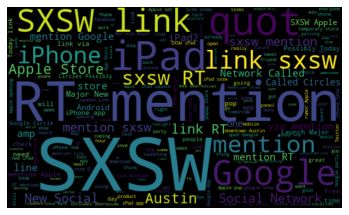

In [70]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()



Neutral             60.295434
Positive emotion    33.325873
Negative emotion     6.378693
Name: Emotion, dtype: float64


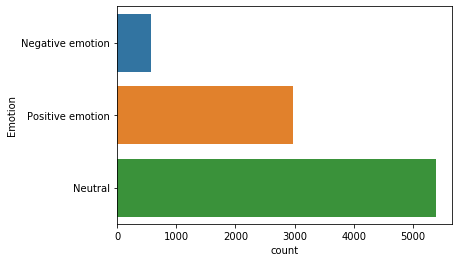

In [19]:
import seaborn as sns

print(df['Emotion'].value_counts(normalize=True)*100)

display(sns.countplot( y="Emotion", data=df))

## Bigrams

In [20]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
text_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
review_scored = text_finder.score_ngrams(bigram_measures.raw_freq)

In [21]:
#MAKE DATA FRAME FROM BIGRAMS
pd.DataFrame(review_scored, columns=["Word","Freq"]).head(20)

,Word,Freq
0,"(apple, store)",0.006242
1,"(social, network)",0.005682
2,"(new, social)",0.005234
3,"(pop, store)",0.004162
4,"(network, called)",0.004065
5,"(google, launch)",0.003985
6,"(major, new)",0.003761
7,"(called, circles)",0.003745
8,"(launch, major)",0.003649
9,"(possibly, today)",0.003089


## Vanilla Model

#Tokenizing Words


In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

#import keras_gridsearch as kg

from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
voc_size = 25000
MAX_SEQUENCE_LENGTH = 40
tokenizer = Tokenizer(num_words=voc_size)

tokenizer.fit_on_texts(X_train_clean_df) 
train_sequences = tokenizer.texts_to_sequences(X_train_clean_df)
test_sequences = tokenizer.texts_to_sequences(X_test_clean_df)


word_index = tokenizer.word_index
print(word_index)

{'the': 1, 'link': 2, 'to': 3, 'at': 4, 'for': 5, 'a': 6, 'ipad': 7, 'google': 8, 'in': 9, 'apple': 10, 'is': 11, 'quot': 12, 'of': 13, 'and': 14, 'store': 15, 'iphone': 16, 'on': 17, 'up': 18, 'new': 19, '2': 20, 'i': 21, 'you': 22, 'with': 23, 'an': 24, 'austin': 25, 'amp': 26, 'my': 27, 'app': 28, 'it': 29, 'launch': 30, 'social': 31, 'today': 32, 'this': 33, 'pop': 34, 'just': 35, 'be': 36, 'circles': 37, 'by': 38, 'from': 39, 'not': 40, 'out': 41, 'are': 42, 'sxsw': 43, 'network': 44, 'that': 45, 'android': 46, 'your': 47, 'via': 48, 'have': 49, 'will': 50, 'line': 51, 'now': 52, 'about': 53, 'free': 54, 'called': 55, 'if': 56, 'me': 57, 'get': 58, 'so': 59, 'party': 60, 'mobile': 61, 'major': 62, 'but': 63, 'all': 64, 'no': 65, 'has': 66, "it's": 67, 'time': 68, 'or': 69, 'can': 70, 'what': 71, 'one': 72, 'like': 73, 'check': 74, 'temporary': 75, 'opening': 76, 'possibly': 77, "i'm": 78, 'w': 79, 'they': 80, 'going': 81, 'downtown': 82, 'here': 83, 'people': 84, 'was': 85, 'we': 

In [24]:
len(word_index)

7668

In [25]:
freq = FreqDist(word_index)
freq.most_common(100)

[("demo's", 7668),
 ('understanding', 7667),
 ('sprinkle', 7666),
 ('havnt', 7665),
 ('firewall', 7664),
 ('jumping', 7663),
 ('11th', 7662),
 ('notch', 7661),
 ('thedomain', 7660),
 ('microformats', 7659),
 ('adapting', 7658),
 ('microformat', 7657),
 ('permission', 7656),
 ('pah', 7655),
 ('heres', 7654),
 ('coynes', 7653),
 ('getdown', 7652),
 ('boggle', 7651),
 ('challenging', 7650),
 ('sack', 7649),
 ('hacky', 7648),
 ('became', 7647),
 ('brush', 7646),
 ('executing', 7645),
 ('cat', 7644),
 ('5min', 7643),
 ('distraction', 7642),
 ('hyperactivity', 7641),
 ('fancy', 7640),
 ('iun', 7639),
 ('rumoured', 7638),
 ('1408', 7637),
 ('creepily', 7636),
 ('6thst', 7635),
 ('hopes', 7634),
 ('zagg', 7633),
 ('q7a', 7632),
 ('queries', 7631),
 ('omitting', 7630),
 ('suicidal', 7629),
 ('parts', 7628),
 ('188', 7627),
 ('idevice', 7626),
 ('po', 7625),
 ('editors', 7624),
 ('fried', 7623),
 ('countdown', 7622),
 ("icenhaur's", 7621),
 ('jdnya', 7620),
 ('pengen', 7619),
 ('furby', 7618),
 

In [26]:
## Pad sequences
X_train_seq = sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test_seq = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train_seq

array([[   0,    0,    0, ..., 2348, 3025, 1685],
       [   0,    0,    0, ...,  528,  349,    2],
       [   0,    0,    0, ..., 1092,   12, 1471],
       ...,
       [   0,    0,    0, ...,   19, 1135, 1202],
       [   0,    0,    0, ...,  259,  304,   41],
       [   0,    0,    0, ...,   77,   32,    2]], dtype=int32)

In [27]:
training_padded = np.array(X_train_seq)

testing_padded = np.array(X_test_seq)


In [28]:
type(y_train)

pandas.core.series.Series

In [29]:
#NN only take integers so we will have to One-Hot Encode to change the labels into integers

from sklearn.preprocessing import label_binarize
from keras.utils import np_utils


y_train_seq = label_binarize(y_train, classes = [0,1,2])
y_test_seq = label_binarize(y_test, classes = [0,1,2])
y_train_seq.shape

(6702, 3)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

def get_earlystop(monitor='val_loss',patience=5, restore_best_weights=False):
    """"""
    args = locals()
    return EarlyStopping(**args)

get_earlystop.__doc__+=EarlyStopping.__doc__

In [31]:
y_test_seq

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [32]:
def make_model(EMBEDDING_SIZE=100):
    model=Sequential()
    model.add(Embedding(voc_size,EMBEDDING_SIZE))
    model.add(LSTM(50,return_sequences=False))

    model.add(Dense(25,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    display(model.summary())
    return model
model = make_model()
history = model.fit(X_train_seq, y_train_seq, epochs=50,batch_size=64, 
                    validation_split = 0.2, callbacks=get_earlystop(),
                   class_weight=weights_dict,workers=3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2500000   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 78        
Total params: 2,531,553
Trainable params: 2,531,553
Non-trainable params: 0
_________________________________________________________________


None

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/50
84/84 [==============================] - 8s 71ms/step - loss: 1.1326 - accuracy: 0.2997 - val_loss: 1.1112 - val_accuracy: 0.4206
Epoch 2/50
84/84 [==============================] - 4s 49ms/step - loss: 0.9204 - accuracy: 0.5582 - val_loss: 1.0057 - val_accuracy: 0.5272
Epoch 3/50
84/84 [==============================] - 4s 48ms/step - loss: 0.6351 - accuracy: 0.6831 - val_loss: 0.8621 - val_accuracy: 0.6331
Epoch 4/50
84/84 [==============================] - 4s 51ms/step - loss: 0.4348 - accuracy: 0.8191 - val_loss: 0.8946 - val_accuracy: 0.6391
Epoch 5/50
84/84 [==============================] - 5s 63ms/step - loss: 0.3524 - accuracy: 0.8514 - val_loss: 0.9508 - val_accuracy: 0.6324
Epoch 6/50
84/84 [==============================] - 4s 47ms/step - loss: 0.3045 - accuracy: 0.8770 - val_loss: 1.0203 - val_accuracy: 0.6473
Epoch 7/50
84/84

In [33]:
y_hat_test = model.predict(X_test_seq).argmax(axis=1)
y_hat_test[:5]

array([1, 2, 2, 2, 2])

In [34]:
y_test_seq.argmax(axis=1)

array([0, 2, 2, ..., 2, 1, 1])

------------------------------------------------------------
MODEL ACCURACY
------------------------------------------------------------
TESTING ACCURACY: 63.7%
------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.33      0.34      0.33       161
           1       0.55      0.59      0.57       752
           2       0.73      0.70      0.72      1321

    accuracy                           0.64      2234
   macro avg       0.54      0.54      0.54      2234
weighted avg       0.64      0.64      0.64      2234

------------------------------------------------------------




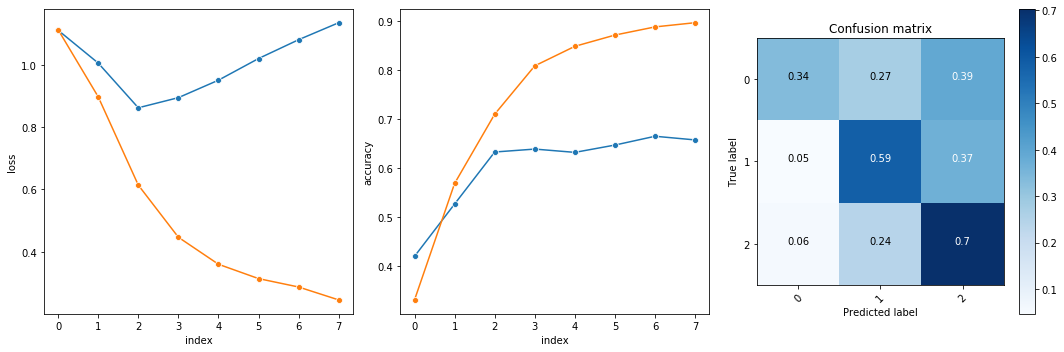

In [37]:
model_eval_nn(y_test_seq.argmax(axis=1),y_hat_test,classes=[0,1,2])

The dataset distribution is imbalanced. We must use some sort of "oversampling" tequnice to balance out the dataset. Theres a method called upsampling that is used around tweet sentiment analysis that consists of adding new tweets for the minority classes, positive and negative, to have them reach a number of tweets equal to the majority class, Neutral here. If we do not do this, the model will try and predict a Neutral label as it is 60% guaranteed due to the imbalance. 

## Vanilla Random Forest Classifier with Tfidf 

In [38]:
#MAKE TFIDFVECTORIZER USING STOPWORDS_LIST
vectorizer = TfidfVectorizer(stop_words=stopwords_list)

# VECTORIZE DATA AND MAKE X_train_tfidf and X_test_tfidf
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf

/Users/phillipojo24/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['sxsw'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<6702x8276 sparse matrix of type '<class 'numpy.float64'>'
	with 74725 stored elements in Compressed Sparse Row format>

In [39]:
#CHECKING LENGTH OF VECTORIZER VOCABULARY
print (len(vectorizer.vocabulary_))

8276


In [40]:
#INITIALIZING CLASSIFIER
rf = RandomForestClassifier(class_weight='balanced')

------------------------------------------------------------
MODEL ACCURACY
------------------------------------------------------------
TRAINING ACCURACY: 99.39%
TESTING ACCURACY: 67.46%
------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.10      0.17       161
           1       0.64      0.44      0.52       752
           2       0.68      0.88      0.77      1321

    accuracy                           0.67      2234
   macro avg       0.66      0.47      0.49      2234
weighted avg       0.67      0.67      0.64      2234

------------------------------------------------------------




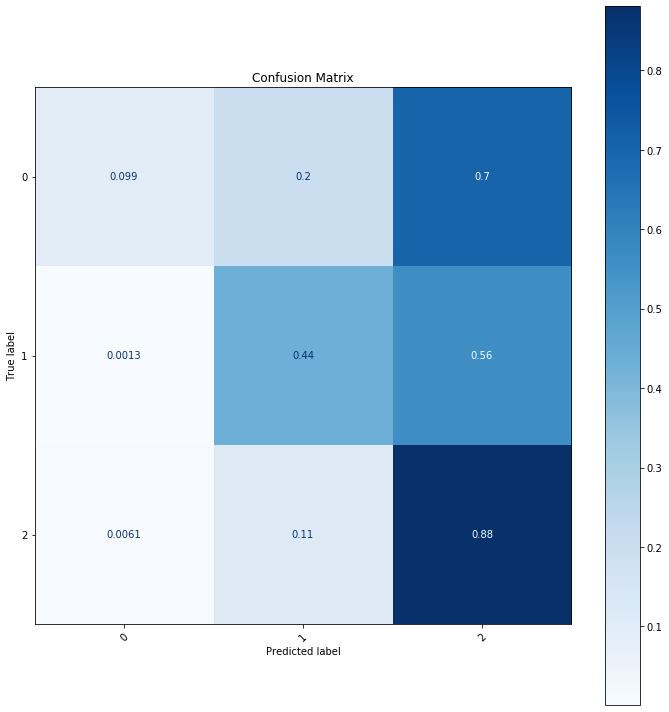

In [41]:
#EVALUATING MODEL USING FUNCTION
model_eval_rff(rf,X_train_tfidf,y_train,X_test_tfidf,y_test)

## Upsampling technique

In [42]:
df_1 = df.copy()
df_1['Emotion'].replace({'Negative emotion': 0 , 'Positive emotion' : 1 , 'Neutral': 2 }, inplace = True)
df_1[df_1['Emotion']==2]

,tweet,Emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,2
16,Holler Gram for iPad on the iTunes App Store -...,2
32,"Attn: All #SXSW frineds, @mention Register fo...",2
33,Anyone at #sxsw want to sell their old iPad?,2
34,Anyone at #SXSW who bought the new iPad want ...,2
...,...,...
9087,"@mention Yup, but I don't have a third app yet...",2
9089,"Wave, buzz... RT @mention We interrupt your re...",2
9090,"Google's Zeiger, a physician never reported po...",2
9091,Some Verizon iPhone customers complained their...,2


In [43]:
from sklearn.utils import resample


train_majority = df_1[df_1['Emotion']==2]
train_minority = df_1[df_1['Emotion']==1]
train_minority0 = df_1[df_1['Emotion']==0]

#Populate for the NEgative class
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)

#Populate for the Positive Class
train_minority0_upsampled = resample(train_minority0, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)

train_upsampled = pd.concat([train_minority_upsampled, train_majority,train_minority0_upsampled])
train_upsampled['Emotion'].value_counts()

2    5388
1    5388
0    5388
Name: Emotion, dtype: int64

In [44]:
#DEFINING New Y (TARGET) AND X VARIABLES
y_new = train_upsampled['Emotion']
X_new=train_upsampled['tweet']
X_new

3976    #sxsw look for the blue hair. I've got your fr...
3274    Just got given a free portable iPhone charger....
5179    RT @mention &quot;Google before you tweet&quot...
6543    RT @mention RT @mention Google to Launch Major...
3365    Props to GSDM and the big G. (google) at #SXSW...
                              ...                        
7528    Is twitter broken? Or is it my iPad. Can't fol...
2738    Would like to know which LBS app I downloaded ...
7866    Google was incapable of doing disruptive innov...
6265    RT @mention Lonely Planet releases free Austin...
8053    Spending some time this morning resetting my a...
Name: tweet, Length: 16164, dtype: object

In [45]:
#TRAIN TEST SPLIT
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_new,y_new, test_size=0.2,
                                                    random_state=69)

In [46]:
# Clean the tweets
X_train_clean_up = X_train_up.apply(cleanTxt)
X_test_clean_up = X_test_up.apply(cleanTxt)
# Show the cleaned tweets
X_train_clean_up

6781    they are everywhere it's just crazy to look ar...
2606    looks like all the apps for are for the what a...
172        ipad2 and a conflagration of doofusness {link}
3348    who uses google tv in this room nobody raises ...
1769    2011 novelty of news apps fades fast among dig...
                              ...                        
7505    oops copy/paste malfunction on the last tweet ...
3018    iphone users at any of you have your gps stuck...
474     before it even begins apple wins sxsw techcrun...
3466    me love them long time catherine &amp lori the...
7186    &quot no other reason for apple's continued su...
Name: tweet, Length: 12931, dtype: object

In [47]:
tokenizer = nltk.TweetTokenizer(preserve_case=False)
tokenizer

In [48]:
#MAKE TFIDFVECTORIZER USING STOPWORDS_LIST

## Make a TfIdf Vectorizer using tweet tokenizer's .tokenize method
vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize,
                           stop_words=stopwords_list)

# VECTORIZE DATA AND MAKE X_train_tfidf and X_test_tfidf
X_train_new_tfidf = vectorizer.fit_transform(X_train_clean_up)
X_test_new_tfidf = vectorizer.transform(X_test_clean_up)
X_train_new_tfidf

/Users/phillipojo24/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['sxsw'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<12931x7829 sparse matrix of type '<class 'numpy.float64'>'
	with 118025 stored elements in Compressed Sparse Row format>

------------------------------------------------------------
MODEL ACCURACY
------------------------------------------------------------
TRAINING ACCURACY: 91.56%
TESTING ACCURACY: 81.32%
------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1085
           1       0.75      0.78      0.77      1070
           2       0.73      0.73      0.73      1078

    accuracy                           0.81      3233
   macro avg       0.82      0.81      0.81      3233
weighted avg       0.82      0.81      0.81      3233

------------------------------------------------------------




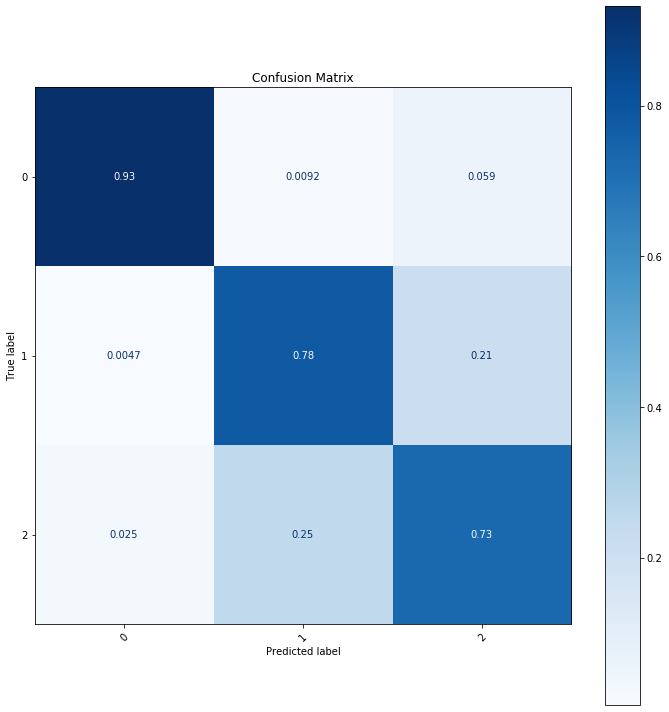

In [49]:
rf_new = RandomForestClassifier(max_depth = 60)
model_eval_rff(rf_new,X_train_new_tfidf,y_train_up,X_test_new_tfidf,y_test_up)

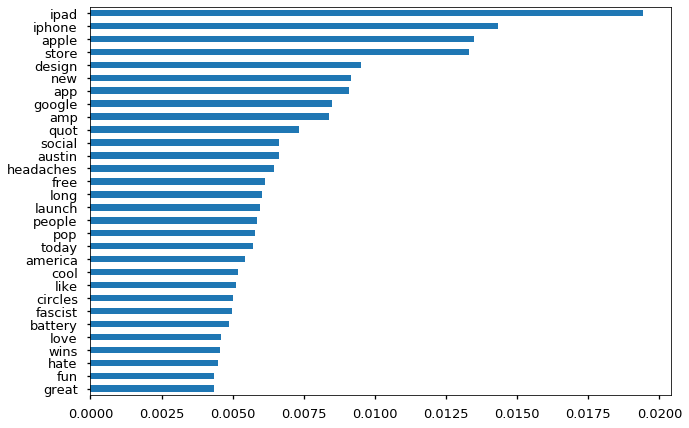

In [50]:
# PLOTTING 30 MOST IMPORTANT FEATURES
with plt.style.context('seaborn-talk'):

    #GETTING FEATURE IMPORTANCE
    importance = pd.Series(rf_new.feature_importances_,index=vectorizer.get_feature_names())

    # SORTING VALUES AND CREATING A BAR CHART WITH 30 MOST IMPORTANT
    importance.sort_values().tail(30).plot(kind='barh')


Above we have the top 30 features that greatly impacted the model that was used to predict the different classes. Here they are in decending order but we would have to dive in and see exactly which word impacted which class.


# Conclusions 

To Summurize, the purpose of this project was to build a model to analyze Twitter sentiment about Apple and Google products. Twitter sentiment analysis provides many exciting opportunities. Being able to analyze tweets in real-time, and determine the sentiment that underlies each message, adds a new dimension to social media monitoring.

  * Random Forest Classifier proved to be the best suitable model for this dataset.
    
  * After using a "upsampling" technique, our model was able to predict Negative tweets by a user 93% of the time which is very impressive do to with the very initial imbalanced data set.

## Recomendations

* Words like "ipad", "iphone", "apple" were important in helping the model predict the differnt classes. We will have to do future analysis to see which classes it specifically impacted in predicting.


## Future Work

* Improve the model by removing words in very low or high frequency

* Find better ways to clean the tweets for better pre processing. Alot of mispelled words and repeated letters.